<a href="https://colab.research.google.com/github/Wilkingc/ddc-datascience/blob/main/Project_2__House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

Wilking Chali Alphonse 22/10/2024

### Problem Definition


In this project, the goal is to minimize the RMS percentage error ( root mean squared percentage error - RMSPE ) of the house sales price prediction.

 This is a Lineal Regresson Problem.


## Data Collection / source

### Data Overview

This data comes from: https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv.


- We have a target column with house prices.

- We have 80 colums besides our target, both numerical and categorical.
understand our data.


## Imports


In [303]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import datasets, metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from scipy import stats
from scipy import special

## File Path & Read the Data

In [304]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
house = pd.read_csv(url)
house.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [305]:
house.shape

(2637, 81)

In [306]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


## Marginal Probability

Pulling each category by type and then performing the marginal probability on each.

Marginal probability for Categorical variables.

In [307]:
houseob = house.select_dtypes(include = 'object')
for col in houseob:
  total_cat = pd.DataFrame(houseob[col].value_counts() / houseob[col].notna().sum()*100)
  print(total_cat)

               count
MS Zoning           
RL         77.474403
RM         15.889268
FV          4.664391
C (all)     0.948047
RH          0.872203
I (all)     0.075844
A (agr)     0.075844
            count
Street           
Pave    99.544937
Grvl     0.455063
           count
Alley           
Grvl   61.666667
Pave   38.333333
               count
Lot Shape           
Reg        63.026166
IR1        33.940083
IR2         2.464922
IR3         0.568828
                  count
Land Contour           
Lvl           89.685248
HLS            4.209329
Bnk            4.019719
Low            2.085703
               count
Utilities           
AllPub     99.886234
NoSewr      0.075844
NoSeWa      0.037922
                count
Lot Config           
Inside      72.961699
Corner      17.406143
CulDSac      6.067501
FR2          3.071672
FR3          0.492984
                count
Land Slope           
Gtl         95.221843
Mod          4.247251
Sev          0.530906
                  count
Neighbor

Marginal probability for integer variables.

In [308]:
housein = house.select_dtypes(include = 'int64')
for col in housein:
  total_int = pd.DataFrame(housein[col].value_counts() / housein[col].notna().sum()*100)
  print(total_int)

              count
PID                
905101070  0.037922
902400090  0.037922
528188120  0.037922
903458170  0.037922
527252070  0.037922
...             ...
533250190  0.037922
531363010  0.037922
527451640  0.037922
909250120  0.037922
528292060  0.037922

[2637 rows x 1 columns]
                 count
MS SubClass           
20           36.708381
60           20.136519
50            9.594236
120           6.560485
30            4.778157
160           4.436860
70            4.361016
80            3.981797
90            3.602579
190           2.047782
85            1.706485
75            0.720516
45            0.606750
180           0.530906
40            0.189609
150           0.037922
             count
Lot Area          
9600      1.592719
7200      1.403110
6000      1.137656
9000      0.985969
10800     0.872203
...            ...
12568     0.037922
6760      0.037922
18386     0.037922
11084     0.037922
12460     0.037922

[1799 rows x 1 columns]
                  count
Overa

Marginal probability for float variables.

In [309]:
houseflo = house.select_dtypes(include = 'float64')
for col in houseflo:
  total_flo = pd.DataFrame(houseflo[col].value_counts() / houseflo[col].notna().sum()*100)
  print(total_flo)

                  count
Lot Frontage           
60.0          11.288848
80.0           5.667276
70.0           5.621572
50.0           4.753199
75.0           4.341865
...                 ...
28.0           0.045704
31.0           0.045704
174.0          0.045704
152.0          0.045704
195.0          0.045704

[126 rows x 1 columns]
                  count
Mas Vnr Area           
0.0           60.443764
176.0          0.497322
216.0          0.459067
200.0          0.459067
120.0          0.459067
...                 ...
970.0          0.038256
509.0          0.038256
522.0          0.038256
291.0          0.038256
137.0          0.038256

[425 rows x 1 columns]
                  count
BsmtFin SF 1           
0.0           31.866464
24.0           0.872534
16.0           0.455235
300.0          0.303490
700.0          0.265554
...                 ...
1571.0         0.037936
683.0          0.037936
978.0          0.037936
482.0          0.037936
1098.0         0.037936

[935 rows x 1 c

## Data Cleaning

Cleaning Categorical data

Here we drop columns with too many nulls to manipulate.

In [310]:
houseob.drop(['Alley','Mas Vnr Type','Fireplace Qu','Pool QC','Fence','Misc Feature',], inplace = True, axis = 1)

In [311]:
houseob.isnull()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2635,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Cleaning Categorical data and replacing null values with column mode

In [312]:
# object-type columns
object_columns = houseob.select_dtypes(include=['object']).columns

for col in object_columns:
    houseob[col].fillna(houseob[col].mode()[0], inplace=True)
houseob.isnull()

<ipython-input-312-0468357f481c>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2635,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Encoding

We will encode our categorical variables into numerical values in order to fit them into our predictive model

In [313]:
# Here we drop the columns that won't benefit our analysis
house_object_int = houseob.copy()
house_object_int.drop(['Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Foundation',
 'BsmtFin Type 2',
 'Heating',
 'Functional',
 'Garage Type',
 'Garage Qual',
 'Sale Type',
 'Sale Condition'], axis =1, inplace = True)

In [314]:
# Create an instance of labelencoder
labelencoder = LabelEncoder()

# Here we encode our categorical variables into integers.
columns_to_encode = ['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Land Slope',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Garage Finish',
 'Garage Cond',
 'Paved Drive']
# For loop to integer encode selected categorical columns
for col in columns_to_encode:
    house_object_int[col] = labelencoder.fit_transform(house_object_int[col])

Let's take a look at the encoded features

In [315]:
house_object_int.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Land Slope,Bldg Type,House Style,Roof Style,Exter Cond,...,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,Heating QC,Central Air,Electrical,Kitchen Qual,Garage Finish,Garage Cond,Paved Drive
0,5,1,3,3,0,0,0,2,1,4,...,4,3,4,4,1,4,3,2,4,0
1,5,1,3,3,0,0,2,2,1,4,...,4,3,5,4,1,4,3,2,4,2
2,6,1,3,0,0,0,0,0,1,2,...,4,3,5,4,1,4,2,2,4,1
3,2,1,0,3,0,0,0,5,1,4,...,4,3,2,0,1,4,2,1,4,2
4,5,1,3,3,0,0,0,5,1,2,...,2,3,0,0,1,4,2,1,4,2


Cleaning numerical data and replacing missing values with column mean

In [316]:
#Droping PID column since it's an identifier
housein.drop('PID', axis =1 , inplace = True)

In [317]:
houseflo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2188 non-null   float64
 1   Mas Vnr Area    2614 non-null   float64
 2   BsmtFin SF 1    2636 non-null   float64
 3   BsmtFin SF 2    2636 non-null   float64
 4   Bsmt Unf SF     2636 non-null   float64
 5   Total Bsmt SF   2636 non-null   float64
 6   Bsmt Full Bath  2635 non-null   float64
 7   Bsmt Half Bath  2635 non-null   float64
 8   Garage Yr Blt   2490 non-null   float64
 9   Garage Cars     2636 non-null   float64
 10  Garage Area     2636 non-null   float64
dtypes: float64(11)
memory usage: 226.7 KB


In [318]:
# List of object-type columns
float_columns = houseflo.select_dtypes(include=['float64']).columns

for col in float_columns:
    houseflo[col].fillna(houseflo[col].mean(), inplace=True)
houseflo.isnull().sum()

<ipython-input-318-4b22392607a3>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
Lot Frontage,0
Mas Vnr Area,0
BsmtFin SF 1,0
BsmtFin SF 2,0
Bsmt Unf SF,0
Total Bsmt SF,0
Bsmt Full Bath,0
Bsmt Half Bath,0
Garage Yr Blt,0
Garage Cars,0


We can see that our dataset is completely clean w/o null values

Let's concatenate our numerical and encoded object variables.

In [319]:
house_numerical = pd.concat([housein, houseflo], axis = 1)
house2= pd.concat([house_numerical,house_object_int], axis = 1)
house2.shape

(2637, 58)

Here we are moving our target to the index [0] for plotting purposes.

In [320]:
house2.insert(0, 'SalePrice', house2.pop('SalePrice'))

## EDA

 Let's tale a look at the correlation between variables.

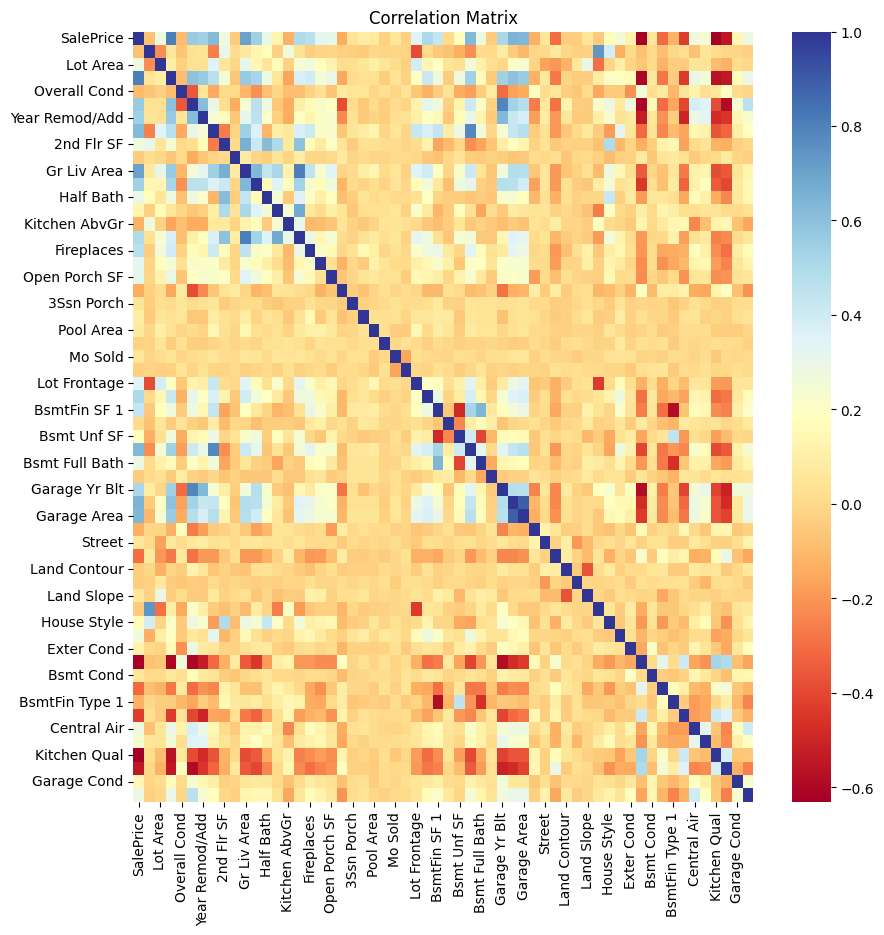

In [321]:
plt.figure(figsize=(10,10))
correlation_matrix = house2.corr()
sns.heatmap(data=correlation_matrix, annot=False, cmap='RdYlBu') ;
plt.title("Correlation Matrix")
plt.show()

In [322]:
corrs1 = house2.corr().round(2).unstack().abs()
corrs1 = corrs1[corrs1 < 1]
corrs1.sort_values(ascending = False)[::2]

Garage Cars    Garage Area      0.89
TotRms AbvGrd  Gr Liv Area      0.81
Gr Liv Area    TotRms AbvGrd    0.81
1st Flr SF     Total Bsmt SF    0.78
Garage Yr Blt  Year Built       0.78
                                ... 
BsmtFin SF 2   Open Porch SF    0.00
Utilities      3Ssn Porch       0.00
               Pool Area        0.00
Lot Area       Garage Yr Blt    0.00
Screen Porch   Bsmt Cond        0.00
Length: 1653, dtype: float64

In [323]:
corr_series = correlation_matrix.abs().unstack()
lt_df = (
  corr_series[ ( 0.70 < corr_series ) & ( corr_series < 1 )]
    .sort_values( ascending=False)
    .drop_duplicates()
    .to_frame()
    .rename( columns={0:"A"} )
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs

Index(['Gr Liv Area', 'SalePrice', 'Garage Cars', 'Year Built', '1st Flr SF',
       'MS SubClass', 'Garage Area', 'TotRms AbvGrd', 'Overall Qual',
       'Garage Yr Blt', 'Total Bsmt SF', 'Bldg Type'],
      dtype='object')

In [324]:
lower_triangle = np.tril(abs(correlation_matrix)+1.1, k=-1)-1.1
lower_triangle_df  = pd.DataFrame(lower_triangle, index=correlation_matrix.index, columns=correlation_matrix.columns)
lt_df = (
  lower_triangle_df
    .unstack()
    .to_frame()
    .rename( columns={0:"A"} )
    .query( "A > 0.70")
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs


Index(['Gr Liv Area', 'SalePrice', 'Garage Cars', 'Year Built', '1st Flr SF',
       'MS SubClass', 'Garage Area', 'TotRms AbvGrd', 'Overall Qual',
       'Garage Yr Blt', 'Total Bsmt SF', 'Bldg Type'],
      dtype='object')

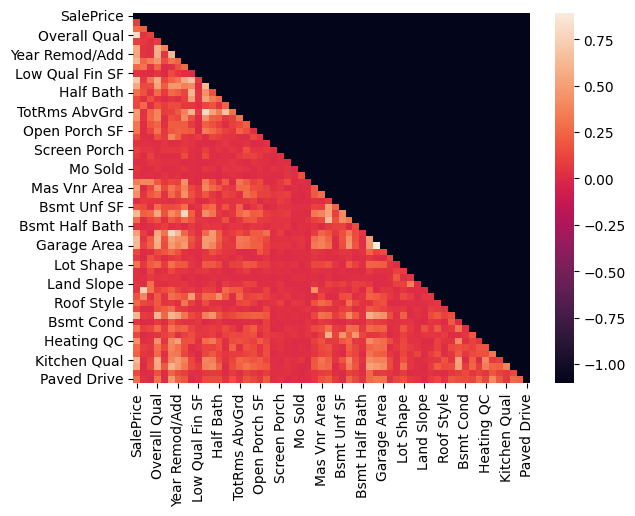

In [325]:
# plt.figure(figsize=(15,15))
sns.heatmap(data=lower_triangle_df, annot=False) ;

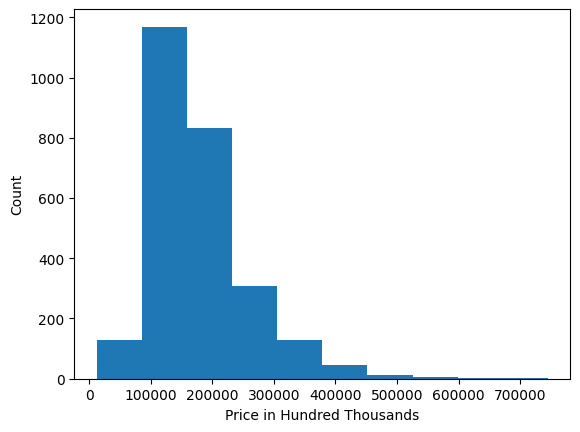

In [326]:
# Let's look at the distribution of SalePrice
plt.hist(house2['SalePrice'])
plt.xlabel('Price in Hundred Thousands')
plt.ylabel("Count")
plt.savefig('test.png')

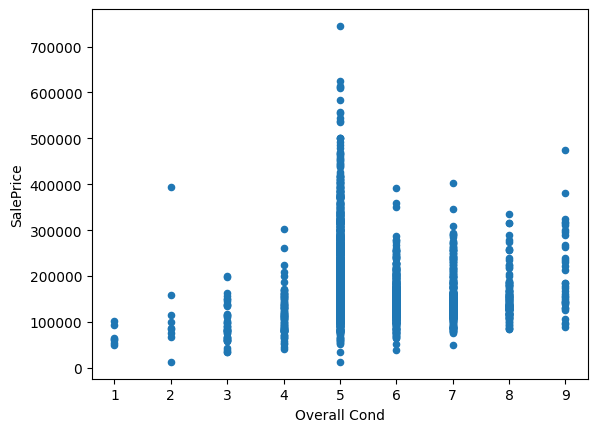

In [327]:
# Let's look at a scatterplot of Overall condition and Sale Price
house2.plot('Overall Cond', 'SalePrice', kind = 'scatter') ;

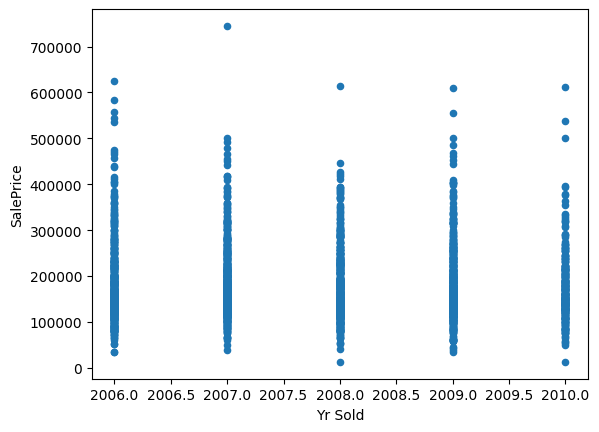

In [328]:
# Let's look at a scatterplot of Year sold and Sale Price
house2.plot('Yr Sold', 'SalePrice', kind = 'scatter') ;

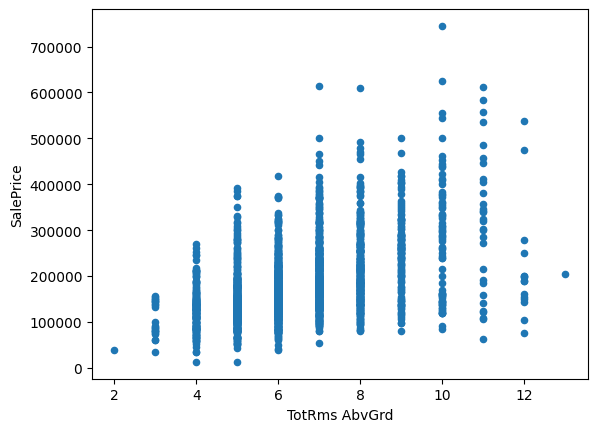

In [329]:
# Let's look at a scatterplot of Total rooms and Sale Price
house2.plot('TotRms AbvGrd', 'SalePrice', kind = 'scatter') ;

#### What do we see?

- Many features are correlate with each other.
- Our target highest correlation is with the Overall Quality of the house.
- Our highest point of sold houses was when the house was 2/4 rooms and the price was between 100,000  and  $300,000 Thousand Dollars.
- We can see an slight slope of the sales from the second half of 2006 to the beginning of 2010. This was due to the [Subprime mortgage crisis](https://en.wikipedia.org/wiki/Subprime_mortgage_crisis) that affected the global economy.

## Processing

#### Fit Model

First, we will fit a model with all predictors.

#### Lineal Regression model

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [331]:
# split into Target and Features
X = house2.drop('SalePrice', axis = 1)
y = house2['SalePrice']

In [332]:
def rmspe(y_test, y_pred):
  '''
  This function takes y_test and y_pred and calculates the RMSPE'''
  return np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

Let's perform a Cross Validation for a Lineal Regression Model

In [333]:
# Perform CV

n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = rmspe(y_test,y_pred)
print(f"CV RMSPE: {results.mean().round(2)}%")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSPE: 20.4%
Number of Predictors: 57


Text(0, 0.5, 'Predicted Values')

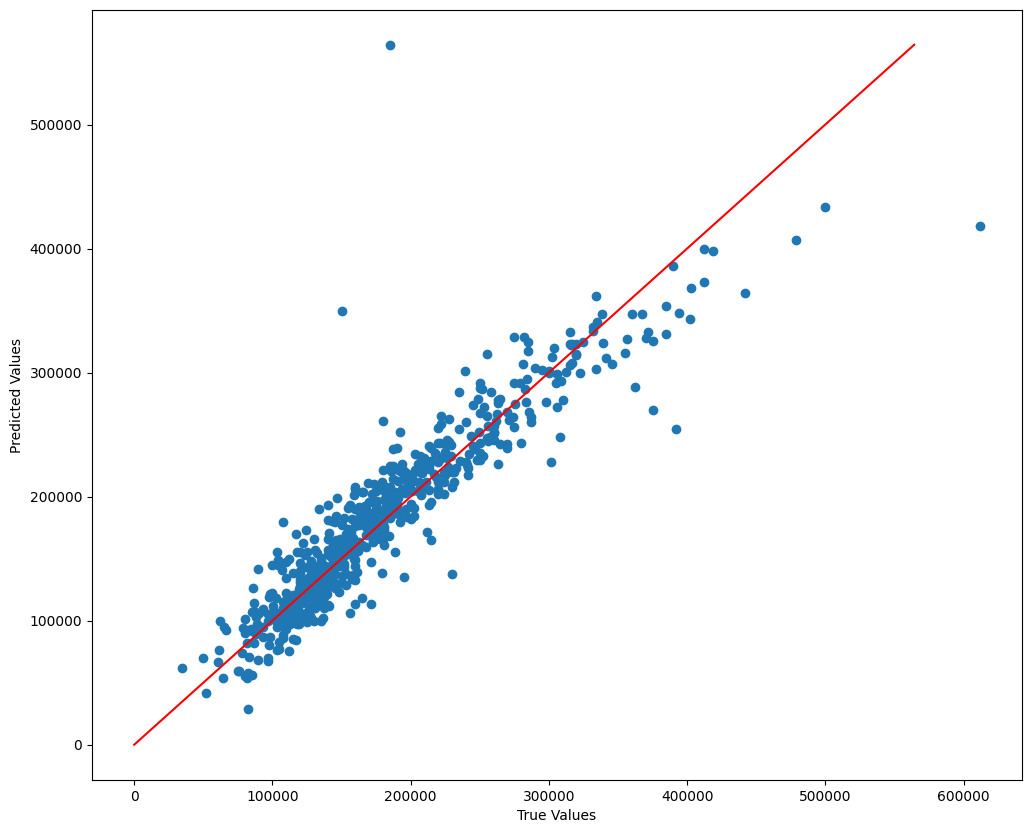

In [334]:
plt.figure(figsize = (12,10));
plt.scatter(y_test,y_pred);
plt.plot([0, max(y_pred)],[0, max(y_pred)], c ='Red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## Feature Selection

### Numerical Predictors & Numerical Response - Pearson Correlation Coefficient

In [335]:
# Let's look at house predictors
house_numerical.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,...,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,20,14299,4,3,1964,1964,1005,0,0,1005,...,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0
1,90,10791,4,5,1967,1967,1296,0,0,1296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0
2,50,9000,6,6,1937,1950,780,595,0,1375,...,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0
3,60,7379,8,5,2000,2000,975,873,0,1848,...,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0
4,70,7200,7,9,1936,2007,575,560,0,1135,...,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0


In [336]:
# Sort correlations w/ Saleprice
house_numerical.corr()['SalePrice'].abs().sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.805016
Gr Liv Area,0.705482
Garage Cars,0.647207
Garage Area,0.633883
Total Bsmt SF,0.628470
1st Flr SF,0.618247
Year Built,0.562777
Full Bath,0.542386
Year Remod/Add,0.539932


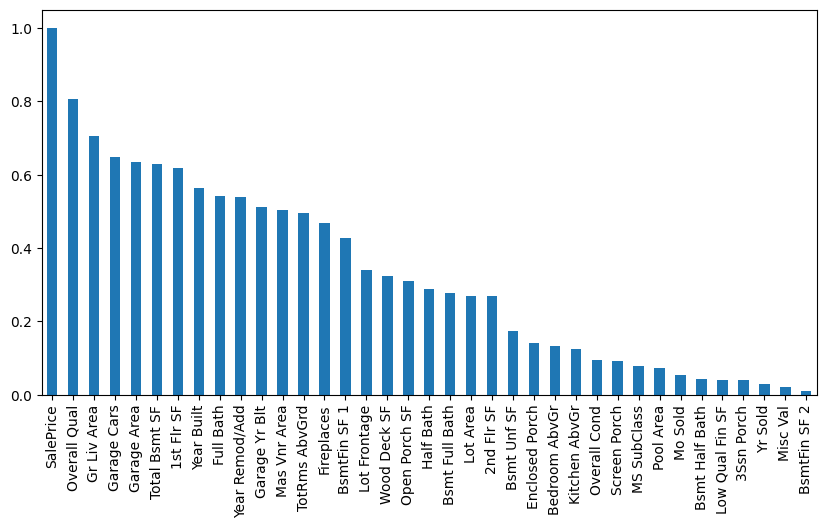

In [337]:
# Plot result
house_numerical.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5)) ;
plt.savefig('Variable plot.png')

In [338]:
# Fit linear regression model w/ just continuous predictors highly correlated with response
corrs = house_numerical.corr()['SalePrice'].abs().sort_values(ascending = False)
keep = corrs[(corrs>.3) & (corrs <1)]
keep

,SalePrice
Overall Qual,0.805016
Gr Liv Area,0.705482
Garage Cars,0.647207
Garage Area,0.633883
Total Bsmt SF,0.628470
1st Flr SF,0.618247
Year Built,0.562777
Full Bath,0.542386
Year Remod/Add,0.539932
Garage Yr Blt,0.512310


In [339]:
X_corr = X[keep.index]
X_corr.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Garage Yr Blt,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Lot Frontage,Wood Deck SF,Open Porch SF
0,4,1005,2.0,440.0,1005.0,1005,1964,1,1964,1964.0,0.0,5,0,513.0,62.0,0,0
1,4,1296,2.0,516.0,0.0,1296,1967,2,1967,1967.0,0.0,6,0,0.0,72.0,0,0
2,6,1375,1.0,544.0,780.0,780,1937,1,1950,1979.0,0.0,6,1,0.0,50.0,0,162
3,8,1848,2.0,592.0,975.0,975,2000,2,2000,2000.0,0.0,7,1,484.0,68.0,280,184
4,7,1135,2.0,576.0,560.0,575,1936,1,2007,1971.0,0.0,6,0,350.0,60.0,256,0


In [340]:
# Combine correlated numerical predictors with all encoded categorical predictors
X = pd.concat([X_corr, house_object_int], axis = 1)
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Garage Yr Blt,...,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,Heating QC,Central Air,Electrical,Kitchen Qual,Garage Finish,Garage Cond,Paved Drive
0,4,1005,2.0,440.0,1005.0,1005,1964,1,1964,1964.0,...,4,3,4,4,1,4,3,2,4,0
1,4,1296,2.0,516.0,0.0,1296,1967,2,1967,1967.0,...,4,3,5,4,1,4,3,2,4,2
2,6,1375,1.0,544.0,780.0,780,1937,1,1950,1979.0,...,4,3,5,4,1,4,2,2,4,1
3,8,1848,2.0,592.0,975.0,975,2000,2,2000,2000.0,...,4,3,2,0,1,4,2,1,4,2
4,7,1135,2.0,576.0,560.0,575,1936,1,2007,1971.0,...,2,3,0,0,1,4,2,1,4,2


In [341]:
X.shape

(2637, 38)

In [342]:
# Perform CV

n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = rmspe(y_test,y_pred)
print(f"CV RMSPE: {results.mean().round(2)}%")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSPE: 21.77%
Number of Predictors: 38


## ANOVA - Categorical Predictors & Numerical Response


<Axes: >

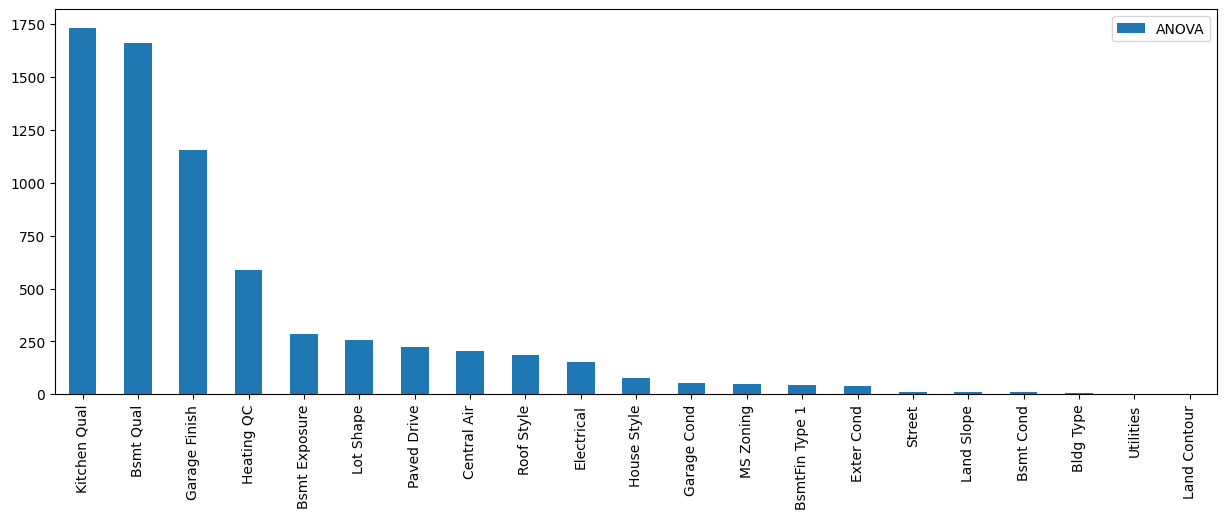

In [343]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fvalue_selector = SelectKBest(f_regression, k='all')  #select features best ANOVA F-Values
fvalue_selector.fit_transform(house_object_int, y)

# Plot results
results = pd.DataFrame({'ANOVA': fvalue_selector.scores_}, index = house_object_int.columns)
results.sort_values(by = 'ANOVA', ascending = False).plot(kind = 'bar', figsize = (15,5))

In [344]:
# Just keep the results with F-values greater than 250
anova = results.sort_values(by = 'ANOVA', ascending = False)
keep = anova['ANOVA'][anova['ANOVA'] > 500]
keep

,ANOVA
Kitchen Qual,1733.679152
Bsmt Qual,1661.482352
Garage Finish,1154.355660
Heating QC,589.920062


In [345]:
X_anova = X[keep.index]

In [346]:
X_anova

,Kitchen Qual,Bsmt Qual,Garage Finish,Heating QC
0,3,4,2,4
1,3,4,2,4
2,2,4,2,4
3,2,2,1,0
4,2,2,1,0
...,...,...,...,...
2632,3,4,2,4
2633,2,2,2,2
2634,2,2,0,4
2635,3,2,1,4


We will concatenate our anova results with the previous features correlation

In [347]:
X2 = pd.concat([X_anova, X_corr], axis = 1)
X2.head()

,Kitchen Qual,Bsmt Qual,Garage Finish,Heating QC,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,...,Full Bath,Year Remod/Add,Garage Yr Blt,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Lot Frontage,Wood Deck SF,Open Porch SF
0,3,4,2,4,4,1005,2.0,440.0,1005.0,1005,...,1,1964,1964.0,0.0,5,0,513.0,62.0,0,0
1,3,4,2,4,4,1296,2.0,516.0,0.0,1296,...,2,1967,1967.0,0.0,6,0,0.0,72.0,0,0
2,2,4,2,4,6,1375,1.0,544.0,780.0,780,...,1,1950,1979.0,0.0,6,1,0.0,50.0,0,162
3,2,2,1,0,8,1848,2.0,592.0,975.0,975,...,2,2000,2000.0,0.0,7,1,484.0,68.0,280,184
4,2,2,1,0,7,1135,2.0,576.0,560.0,575,...,1,2007,1971.0,0.0,6,0,350.0,60.0,256,0


In [348]:
( X_corr.shape, X_anova.shape, X.shape, X2.shape)

((2637, 17), (2637, 4), (2637, 38), (2637, 21))

In [349]:
# Perform CV
n = 500
rmspe_results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmspe_results[idx] = rmspe(y_test,y_pred)
print(f"CV RMSPE: {rmspe_results.mean().round(2)}%")
print(f"Number of Predictors: {len(X2.columns)}")

CV RMSPE: 21.4%
Number of Predictors: 21


## Regularization

In [350]:
# Scale the DF using standard scaler

In [351]:
# scaled_df = StandardScaler().fit_transform(house2)
# scaled_df = pd.DataFrame(scaled_df, columns = house2.columns)
# scaled_df.head()
# house2 = scaled_df

This data set is the cleaned without the feature selection from correlation.

In [352]:
house2.shape

(2637, 58)

In [353]:
house2.head()

,SalePrice,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,Heating QC,Central Air,Electrical,Kitchen Qual,Garage Finish,Garage Cond,Paved Drive
0,115400,20,14299,4,3,1964,1964,1005,0,0,...,4,3,4,4,1,4,3,2,4,0
1,90000,90,10791,4,5,1967,1967,1296,0,0,...,4,3,5,4,1,4,3,2,4,2
2,141000,50,9000,6,6,1937,1950,780,595,0,...,4,3,5,4,1,4,2,2,4,1
3,254000,60,7379,8,5,2000,2000,975,873,0,...,4,3,2,0,1,4,2,1,4,2
4,155000,70,7200,7,9,1936,2007,575,560,0,...,2,3,0,0,1,4,2,1,4,2


In [354]:
# %%capture --no-stdout
X_lasso = house2.drop('SalePrice', axis = 1)
y_lasso = house2['SalePrice']

# Specify values of alpha we want to try
alph = [1e-3, 1e-2, 1e-1, 1, 2, 3, 5, 7, 10, 20]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10000); # Looping through alpha

  # Calculate CV RMSE
  n = 100
  results = np.zeros(n)
  for idx in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)
    # Standard Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    # Fir regression
    my_fit_lasso.fit(X_train, y_train)

    # Scale testing features
    X_test = scaler.transform(X_test)

    #Predict
    y_pred = my_fit_lasso.predict(X_test)

    results[idx] = rmspe(y_test,y_pred)

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})


In [355]:
results_df.sort_values( by = 'RMSPE' )

,Alpha,RMSPE
4,2.000,20.305760
6,5.000,20.475771
1,0.010,20.488610
5,3.000,20.520633
2,0.100,20.649800
9,20.000,20.709887
3,1.000,20.812261
8,10.000,20.879956
0,0.001,20.883275
7,7.000,21.105305


In [356]:
# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)
  model = Lasso(alpha = 2, tol = .01, max_iter=10000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = rmspe(y_test,y_pred)
print(f"CV RMSPE: {results.mean().round(2)}")
print(f"Number of Predictors: {sum(model.coef_ >0)}")

CV RMSPE: 20.56
Number of Predictors: 34


In [357]:
X_lasso.shape

(2637, 57)

In [358]:
len(X_lasso.columns)

57

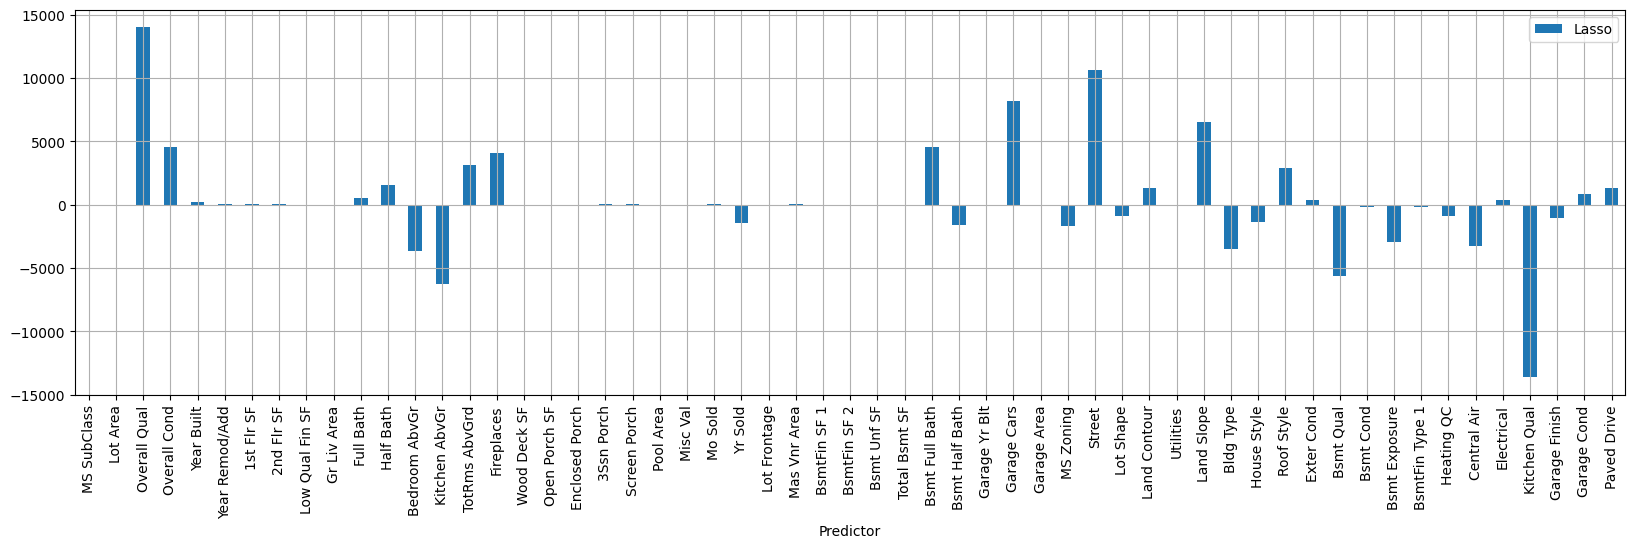

In [359]:
# Plot model coefficients
model_results = pd.DataFrame()
model_results['Predictor'] = X_lasso.columns
model_results['Lasso'] = model.coef_
model_results.plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5)
    )
plt.grid()

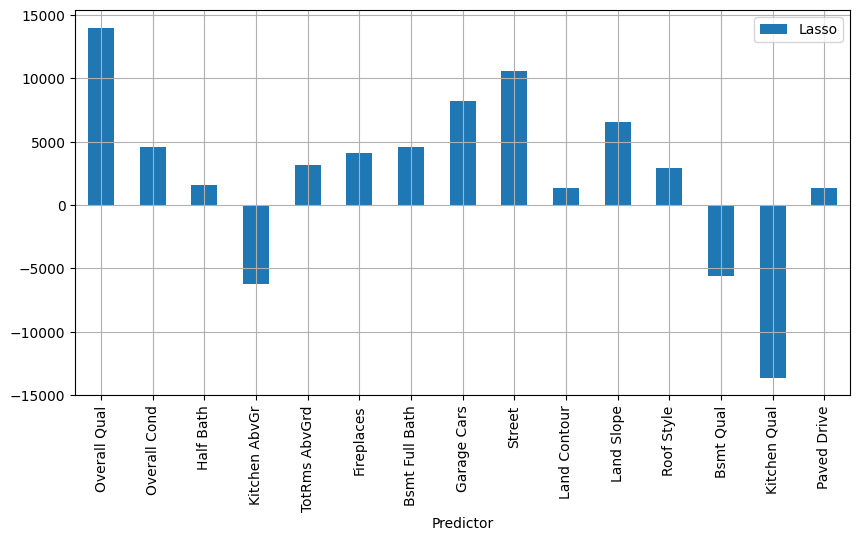

In [360]:
# Plot parameters with coefficients greater than 0
greater_0 = model_results[(model_results['Lasso'] > 1000 ) | (model_results['Lasso'] < -5000)]
greater_0.plot(x = 'Predictor', kind = 'bar', figsize = (10,5))
plt.grid()

### Residual Analysis

In [361]:
y_test.shape

(660,)

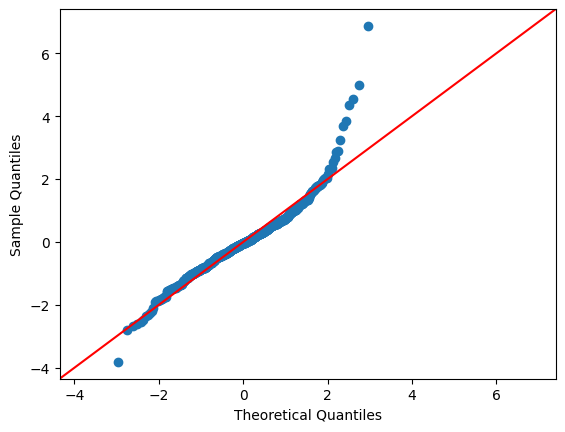

In [362]:
# QQ Plot - Residuals of Model Above
import scipy.stats as stats
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45")
plt.show()

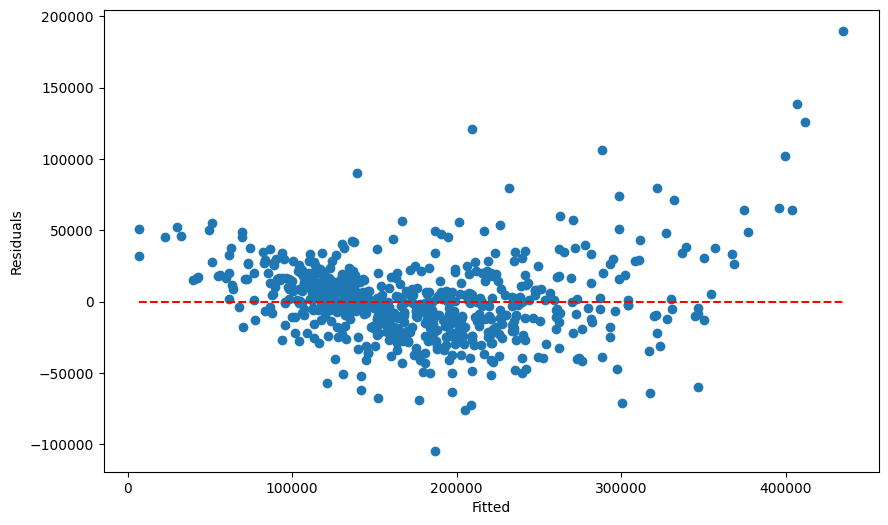

In [364]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

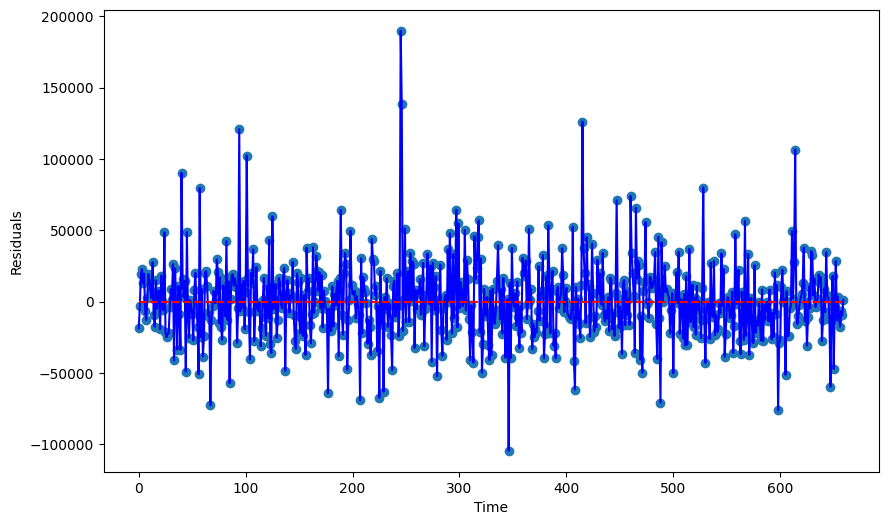

In [365]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

### Box Cox Implementation

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 4)
fitted_data, fitted_lambda = stats.boxcox(y_train)
print(fitted_lambda)

0.052200723204883503


In [367]:
y_train.mean() , y_train.median()

(179039.6173541963, 160000.0)

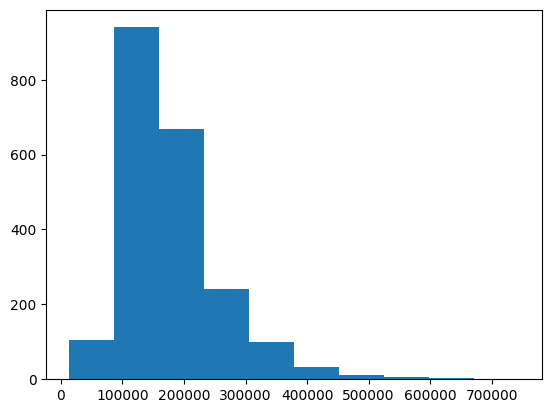

In [368]:
plt.hist(y_train) ;

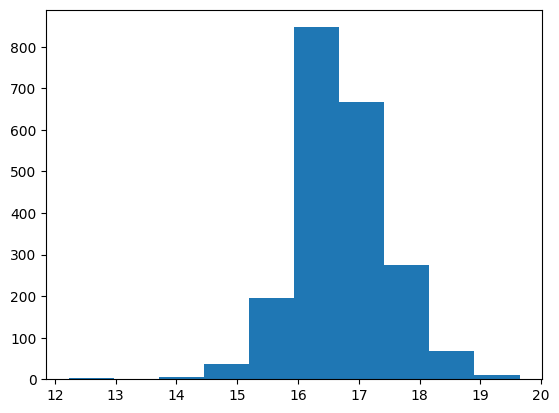

In [369]:
plt.hist(fitted_data) ;

In [370]:
# Perform CV
# FIXME insert
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  fitted_data, fitted_lambda = stats.boxcox(y_train) # Perform the box cox transformation on y_train
  model = sm.OLS(fitted_data, X_train).fit() # Fit the linear Lasso model.
  y_pred = model.predict(X_test)
  real_y_pred = special.inv_boxcox(y_pred, fitted_lambda) # Perform the inverse box cox to get predictions back on original scale
  results[idx] = rmspe(y_test,real_y_pred)
print(f"CV RMSPE: {results.mean().round(2)*10000}")

CV RMSPE: 274100.0


## Data Visualization

In [371]:
# Line Plot
fig = px.line(
    house2,
    x = 'SalePrice',
    y = 'Yr Sold',
    facet_col = 'Overall Qual',
    color = 'TotRms AbvGrd'
    )
fig.show()

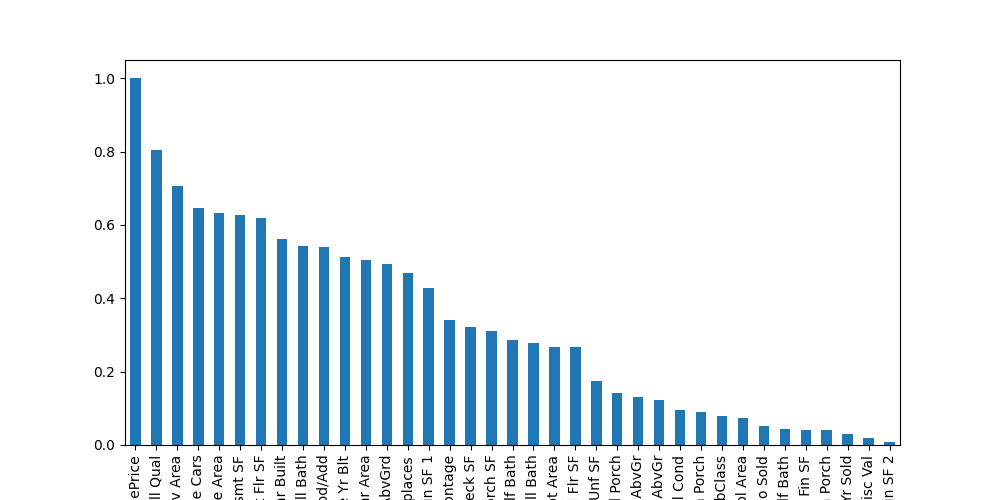

In [372]:
Image('Variable plot.png')

In [373]:
import plotly.express as px

# Animated scatter plot showing housing prices over time
fig = px.scatter(
    house2,
    x="Overall Qual",  # Overall quality of the house on the x-axis
    y="SalePrice",     # Sale price of the house on the y-axis
    size="TotRms AbvGrd",  # Number of rooms above ground controlling the size of the points
    color="SalePrice",     # Color representing the sale price
    animation_frame="Yr Sold",  # Year sold for animation
    hover_name="Street",   # Street name for hover information
    size_max=60,           # Max size for bubbles
    title="Housing Prices Over Time: Overall Quality vs Sale Price",  # Title of the plot
    labels={
        "Overall Qual": "Overall Quality",
        "SalePrice": "Sale Price (USD)",
        "TotRms AbvGrd": "Total Rooms Above Ground",
        "Yr Sold": "Year Sold"
    }
)

# Dynamically set y-axis range based on the actual sale prices
fig.update_yaxes(range=[house2['SalePrice'].min(), house2['SalePrice'].max()])

# Customize the animation speed and layout
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # Slower animation
fig.update_layout(transition_duration=500)

# Show the animated plot
fig.show()

In [374]:
import plotly.express as px

# Animated line plot showing housing prices over time by overall quality
fig = px.line(
    house2,
    x="Yr Sold",          # Year sold on the x-axis
    y="SalePrice",        # Sale price on the y-axis
    color="Overall Qual",  # Different line colors for each overall quality category
    line_group="Overall Qual",  # Group by overall quality to create separate lines
    hover_name="Street",   # Hover info to display street name
    title="Trend of Housing Prices Over Time by Overall Quality",
    labels={
        "Yr Sold": "Year Sold",
        "SalePrice": "Sale Price (USD)",
        "Overall Qual": "Overall Quality"
    }
)

# Dynamically set y-axis range based on the actual sale prices
fig.update_yaxes(range=[house2['SalePrice'].min(), house2['SalePrice'].max()])

# Add transitions for smooth animation between years
fig.update_layout(transition_duration=500)

# Show the animated line plot
fig.show()

Let's Take a look at the RMSPE values from our Lasso Model

In [375]:
data = results_df
# Line plot using Plotly
fig = px.line(
    data,
    x='Alpha',
    y='RMSPE',
    title='RMSPE vs Alpha Values',
    labels={'Alpha': 'Alpha', 'RMSPE': 'RMSPE (%)'},
    log_x=True  # Log scale for better visualization of the range of alphas
)

# Customize the plot
fig.update_traces(marker=dict(size=8, color='blue'), line=dict(width=2))
fig.show()

## Conclusion

# Important features


- Our target highest correlation is with the Overall Quality of the house which makes sense since this characteristic englobes all the features customers prefer in their house.
- Space was a big factor for house pricing and also buyers were more into houses with more SF and garage space. Which also makes sense since houses with 2/4 rooms were very popular during this period of time.
- We infer that families with multiple children were the primary buyers.
- Our highest point of sold houses was when the house was 2/4 rooms and the price was between 100,000  and  $300,000 Thousand Dollars.
- We can see an slight slope of the sales from the second half of 2006 to the beginning of 2010. This was due to the [Subprime mortgage crisis](https://en.wikipedia.org/wiki/Subprime_mortgage_crisis) that affected the global economy.

### Model performance

- Using Lasso Regression resulted in an average RMSPE of 20.5% in our cross-validation tests being the highest between itself and the Lineal Regression model.

- Outliers are needed in the model especially when we have a price range so wide, meaning that our mean price is 179,986 but the max price is 745,000. for this reason the RMSPE is higher than expected.


### Future exploration/ Next steps

- It would be worth exploring alternative models and approaches to this dataset since we can gain importan insights moving on. specially if the organization is planning to build or by properties in the future.
- Further feature engineering may also be helpful such as seeing if we can find a correlation of thes features with the real state crisis and in the future create models to build properties that will do better in the middle of a crisis.
- Finally the dicrease and increase of Sale Prices is a good oportunity to to spot trends/outliers to have better short and long term results.
